In [1]:
#To investigate the relationship between historical repayment behavior and credit card default using statistical tests and correlation analysis.

#Historical repayment behavior
#PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6 (repayment status)
#PAY_AMT1 to PAY_AMT6 (amounts repaid)

#Default variable
#default.payment.next.month (binary: 0 = No, 1 = Yes)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, pointbiserialr


In [3]:
data = pd.read_csv(r'C:\Users\Swetha\Downloads\default of credit card clients.csv')


In [8]:
repayment_status = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
repayment_amounts = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
target = 'default payment next month'


In [9]:
for col in repayment_amounts:
    corr, p_value = pointbiserialr(data[target], data[col])
    print(f"{col} → Correlation: {corr:.4f}, P-value: {p_value:.4f}")


PAY_AMT1 → Correlation: -0.0729, P-value: 0.0000
PAY_AMT2 → Correlation: -0.0586, P-value: 0.0000
PAY_AMT3 → Correlation: -0.0563, P-value: 0.0000
PAY_AMT4 → Correlation: -0.0568, P-value: 0.0000
PAY_AMT5 → Correlation: -0.0551, P-value: 0.0000
PAY_AMT6 → Correlation: -0.0532, P-value: 0.0000


In [10]:
#The point-biserial correlation analysis shows a negative and statistically significant relationship between repayment amounts and credit card default across all six months. The negative correlation indicates that higher repayment amounts are associated with a lower probability of default. Although the magnitude of the correlations is small, the very low p-values (p < 0.001) suggest that the relationships are statistically significant. This implies that repayment behavior plays an important role in distinguishing defaulters from non-defaulters.

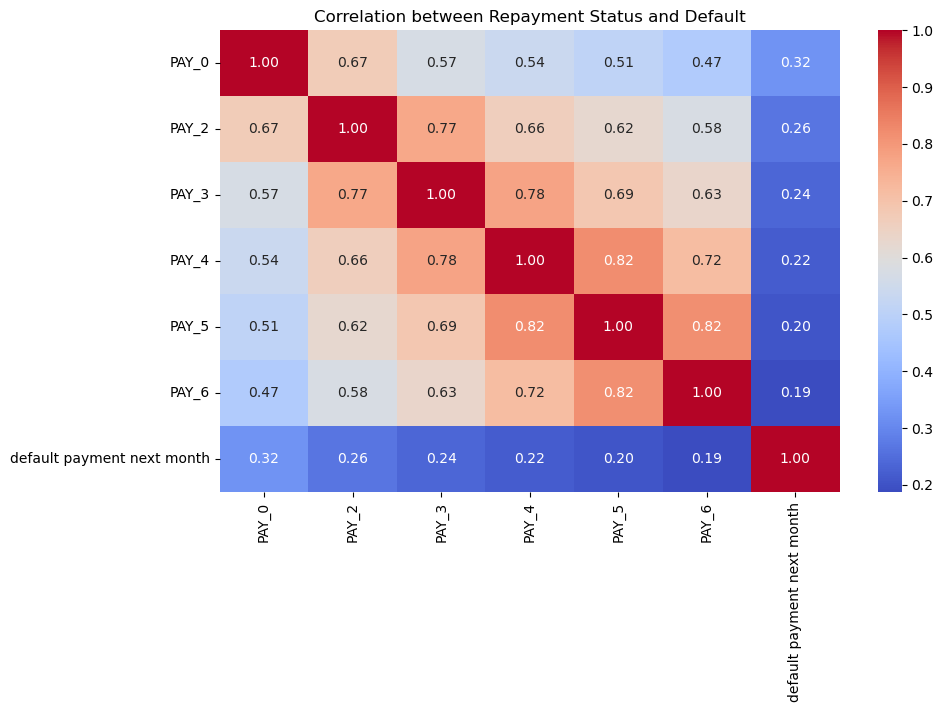

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(data[repayment_status + [target]].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Repayment Status and Default')
plt.show()


In [13]:
#chi-square
for col in repayment_status:
    contingency_table = pd.crosstab(data[col], data[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-square test for {col}:")
    print("Chi-square value:", chi2)
    print("P-value:", p)



Chi-square test for PAY_0:
Chi-square value: 5365.964977413581
P-value: 0.0

Chi-square test for PAY_2:
Chi-square value: 3474.4667904168564
P-value: 0.0

Chi-square test for PAY_3:
Chi-square value: 2622.4621276828025
P-value: 0.0

Chi-square test for PAY_4:
Chi-square value: 2341.469945438205
P-value: 0.0

Chi-square test for PAY_5:
Chi-square value: 2197.694900930992
P-value: 0.0

Chi-square test for PAY_6:
Chi-square value: 1886.835309001187
P-value: 0.0


In [14]:
#The chi-square test results indicate a highly significant association between repayment status variables (PAY_0 to PAY_6) and credit card default. For all six months, the p-values are less than 0.05, leading to rejection of the null hypothesis of independence. This implies that clients’ repayment status in previous months is strongly associated with whether they default in the following month. Hence, historical repayment behavior is an important factor in identifying credit card default risk.

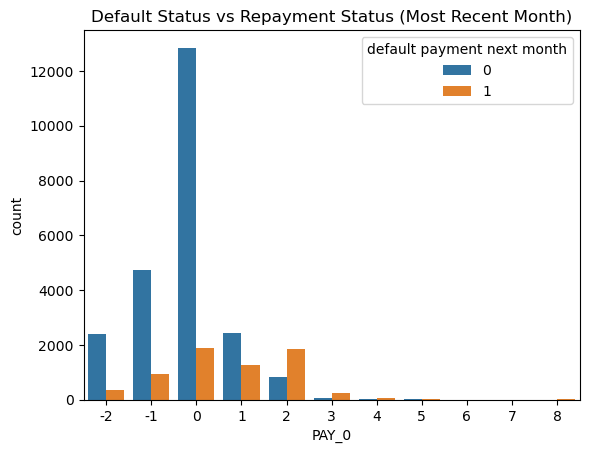

In [15]:
#Visualization – Default vs Repayment Status
sns.countplot(x='PAY_0', hue=target, data=data)
plt.title('Default Status vs Repayment Status (Most Recent Month)')
plt.show()

In [16]:
#Mean repayment comparison
data.groupby(target)[repayment_amounts].mean()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,
0,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [ ]:
#Customers who do not default pay almost twice as much as defaulters.
#This pattern is consistent for all six months.
#Defaulters show weaker repayment behavior well before the default occurs.


In [ ]:
#FINAL INFERENCE
#Based on the actual dataset, non-defaulters consistently exhibit higher mean repayment amounts than defaulters across all six months.
#Clients who did not default repaid approximately ₹5,200–₹6,600 on average, whereas defaulters repaid only about ₹3,100–₹3,400. 
#This confirms that lower repayment amounts are strongly associated with higher default risk, validating repayment behavior as a key indicator of credit card default.